## The ``merge`` function
Let's experiment with the ``merge`` function.

I will create two different dataframes, ``fruits_df`` and ``fruits_alt_df``:

In [ ]:
import pandas as pd
fruit_data = [["apple", 5, "red"], ["banana", 6, "yellow"], ["blueberry", 9, "blue"], ["mango", 5, "orange"]]
fruits_df = pd.DataFrame(fruit_data, columns=["Name", "Name length", "Colour"])
fruits_df

In [ ]:
fruits_alt_data = [["apple", "green"], ["banana", "brown"], ["blueberry", "purple"], ["mango", "green"]]
fruits_alt_df = pd.DataFrame(fruits_alt_data, columns = ["Name", "Alt Colour"])
fruits_alt_df

### Question

I want to add the Alt Colour column in ``fruits_alt_df`` to ``fruits_df``. How can I do this using the merge function?

Modify the following line of code from lecture:

``ttr_df = pd.merge(overall_ttr_df, standardized_ttr_df, on="Text")``

to merge ``fruits_alt_df`` with ``fruits_df``, then store the result in a variable called ``fruits_merged_df``.

(What do we need to put in the ``on`` parameter?)

In [ ]:

fruits_merged_df

### Question

Let's observe what happens if we add extra rows. Now ``fruits_alt_df`` has more rows than ``fruits_df``. After we merge them, what happened to the extra rows that were added?

In [ ]:
fruits_alt_data = [["apple", "green"], ["banana", "brown"], ["blueberry", "purple"],
                   ["mango", "green"],["avocado", "brown"], ["grape", "green"]]
                   
fruits_alt_df = pd.DataFrame(fruits_alt_data, columns = ["Name", "Alt Colour"])
fruits_alt_df

In [ ]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, on="Name")
fruits_merged_df

### Question
If we check the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), we see that we can input extra parameters, such as the "how" argument. Try running the below cells, then try to understand how they work!

In [ ]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, on="Name", how="outer")
fruits_merged_df

In [ ]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, how="cross")
fruits_merged_df

## The ``.groupby()`` method
Now let's work with a real example. 

In [9]:
import pandas as pd

checkouts_df = pd.read_csv('seattle_checkouts.csv')
checkouts_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Digital,OverDrive,EBOOK,2020,4,2,Nighttime Symphony,Timbaland,"Juvenile Fiction, Picture Book Fiction","Simon & Schuster, Inc.",2019
1,Digital,OverDrive,EBOOK,2020,4,2,Cold Kill,Rennie Airth,"Fiction, Mystery, Thriller",Severn House Publishers Ltd,2020
2,Digital,OverDrive,AUDIOBOOK,2020,4,1,The Choice (Unabridged),Nicholas Sparks,"Fiction, Literature",Books on Tape,2007
3,Digital,OverDrive,EBOOK,2020,4,3,The Master Key System,Charles F. Haanel,"New Age, Nonfiction, Self-Improvement",Duke Classics,2020
4,Digital,OverDrive,EBOOK,2020,4,12,The Doughnut King,Jessie Janowitz,"Juvenile Fiction, Juvenile Literature",Sourcebooks,2019
...,...,...,...,...,...,...,...,...,...,...,...
93666,Digital,OverDrive,EBOOK,2020,4,4,"The Black Moth: Historical Romances Series, Bo...",Georgette Heyer,"Fiction, Historical Fiction, Literature, Romance",Sourcebooks,2010
93667,Digital,OverDrive,AUDIOBOOK,2020,4,1,A Death in the Family (Unabridged),James Agee,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012
93668,Digital,OverDrive,EBOOK,2020,4,2,My Fate According to the Butterfly,Gail Villanueva,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2019
93669,Digital,OverDrive,AUDIOBOOK,2020,4,17,The Second Sleep: A novel (unabridged) (Unabri...,Robert Harris,"Fiction, Suspense, Thriller",Books on Tape,2019


Question: How can I sort the table by the number of checkouts of each item? 

In [15]:
checkouts_df.sort_values(by="Checkouts", ascending=False)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
46348,Digital,OverDrive,AUDIOBOOK,2020,4,1894,Harry Potter and the Sorcerer's Stone: Harry P...,J. K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012
78951,Digital,OverDrive,EBOOK,2020,4,743,Harry Potter and the Sorcerer's Stone: Harry P...,J. K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012
86961,Digital,OverDrive,EBOOK,2020,4,565,Becoming,Michelle Obama,"African American Nonfiction, Biography & Autob...","Random House, Inc.",2018
30319,Digital,OverDrive,EBOOK,2020,4,553,"Funny, You Don't Look Autistic: A Comedian's G...",Michael McCreary,"Biography & Autobiography, Performing Arts, So...",Annick Press,NaN
30025,Digital,OverDrive,AUDIOBOOK,2020,4,520,Becoming (Unabridged),Michelle Obama,"African American Nonfiction, Biography & Autob...",Books on Tape,2018
...,...,...,...,...,...,...,...,...,...,...,...
16,Digital,OverDrive,EBOOK,2020,4,1,Liberty,Kirby Larson,"Historical Fiction, Juvenile Fiction","Scholastic, Inc. (US)",2016
18,Digital,OverDrive,EBOOK,2020,4,1,In this Rain: A Novel,S.J. Rozan,"Fiction, Mystery, Suspense, Thriller","Random House, Inc.",2009
20,Digital,OverDrive,EBOOK,2020,4,1,Coffeehouse Angel,Suzanne Selfors,"Fantasy, Romance, Young Adult Fiction",Bloomsbury USA,2010
21,Digital,OverDrive,EBOOK,2020,4,1,Betting on the Muse,Charles Bukowski,"Fiction, Poetry",HarperCollins Publishers Inc.,2007


Let's try to find the creators whose works were checked out the most in April 2020. 

In [16]:
#Why does this not accurately portray the creators whose works were checked out the most?
checkouts_df['Creator'].value_counts()[:20]

Creator
James Patterson              370
Daisy Meadows                219
Agatha Christie              211
Gertrude  Chandler Warner    174
Geronimo Stilton             172
Mary Pope Osborne            170
Stephen King                 168
Louis L'Amour                167
Nora Roberts                 158
Erin Hunter                  152
Dan Gutman                   147
Stuart Woods                 144
M. C. Beaton                 144
Stan Berenstain              136
DK                           131
Robert B. Parker             120
Janet Evanovich              116
Clive Cussler                116
J. A. Jance                  112
Debbie Macomber              111
Name: count, dtype: int64

We can use the ``.groupby()`` and ``.sum()`` method.

### Question

First, I want to group by the Creator column.

What do I need to add to this to group by creator?

In [18]:
checkouts_grouped_creator = checkouts_df.groupby("Creator")
checkouts_grouped_creator

We can't see the resulting groupby object, but we can check some of its info by applying methods, like `.size()`.

In [19]:
checkouts_grouped_creator.size()

Creator
(法)凡尔纳              1
50 Cent             3
A'Lelia Bundles     2
A. A. Aguirre       1
A. A. Milne        13
                   ..
현진건 외 11명           1
히가시노 게이고            1
（法）卡罗琳•吉约           1
（美）梭罗               1
［美］劳拉·英格斯·怀德        4
Length: 29618, dtype: int64

Now, to add together the checkouts corresponding to each creator, I can use the `.sum()` method!

In [20]:
checkouts_grouped_summed_df = checkouts_df.groupby(['Creator']).sum()
checkouts_grouped_summed_df[:20]

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Subjects,Publisher,PublicationYear
Creator,,,,,,,,,,
(法)凡尔纳,Digital,OverDrive,EBOOK,2020,4,1,海底两万里,"Fantasy, Fiction","Beijing Champion Library Culture & Media Co., ...",2018
50 Cent,DigitalDigitalDigital,OverDriveOverDriveOverDrive,EBOOKAUDIOBOOKEBOOK,6060,12,4,Formula 50: A 6-Week Workout and Nutrition Pla...,"Health & Fitness, NonfictionAfrican American F...","Penguin Group (USA), Inc.Blackstone Audio, Inc...",201320162009
A'Lelia Bundles,DigitalDigital,OverDriveOverDrive,AUDIOBOOKEBOOK,4040,8,10,Self Made: Inspired by the Life of Madam C.J. ...,"African American Nonfiction, Biography & Autob...","Simon & Schuster - AudiobooksSimon & Schuster,...",20202020
A. A. Aguirre,Digital,OverDrive,EBOOK,2020,4,1,"Bronze Gods: Apparatus Infernum Series, Book 1","Fantasy, Fiction","Penguin Group (USA), Inc.",2013
A. A. Milne,DigitalDigitalDigitalDigitalDigitalDigitalDigi...,OverDriveOverDriveOverDriveOverDriveOverDriveO...,AUDIOBOOKAUDIOBOOKEBOOKEBOOKEBOOKEBOOKAUDIOBOO...,26260,52,48,When We Were Very Young / Now We Are Six (Unab...,"Juvenile Fiction, Juvenile LiteratureClassic L...","Blackstone Audio, Inc.Blackstone Audio, Inc.Du...",2005201520202009202020092005202020202009200920...
A. Alpheus,Digital,OverDrive,EBOOK,2020,4,1,"How to Hypnotize: Complete Hypnotism, Mesmeris...","New Age, Nonfiction, Psychology, Self-Improvement",Duke Classics,2020
A. B. Greenfield,Digital,OverDrive,EBOOK,2020,4,1,"Cat Detective: Ra the Mighty Series, Book 1","Historical Fiction, Juvenile Fiction, Juvenile...","Random House, Inc.",2018
A. B. Jewell,Digital,OverDrive,AUDIOBOOK,2020,4,4,The Man Who Wouldn't Die: A Novel (unabridged)...,"Fiction, Humor (Fiction), Mystery, Thriller",HarperCollins Publishers Inc.,2019
A. Birnbaum,Digital,OverDrive,EBOOK,2020,4,1,Green Eyes,"Juvenile Fiction, Juvenile Literature","Random House, Inc.",2013


**Question:** How can I select just the Creator and Checkouts column from the dataframe `checkouts_grouped_creator_summed`? Add to the cell below:

In [21]:
checkouts_grouped_summed_df[["Checkouts"]]

,Checkouts
Creator,
(法)凡尔纳,1
50 Cent,4
A'Lelia Bundles,10
A. A. Aguirre,1
A. A. Milne,48
...,...
현진건 외 11명,1
히가시노 게이고,1
（法）卡罗琳•吉约,1


Now I can find the ten authors with the most checkouts in total, using the `.nlargest()` method!

**Question:** What would I need to change to get the top *20* most checked out authors?

In [24]:
top_10_creators = checkouts_grouped_summed_df[["Checkouts"]].nlargest(10, columns="Checkouts")
top_10_creators

,Checkouts
Creator,
J. K. Rowling,3877
James Patterson,1711
David Baldacci,1449
Michael Connelly,1367
Agatha Christie,1362
Stephen King,1271
Lee Child,1264
John Grisham,1154
Kevin Kwan,1153


... And plot the result!

<Axes: title={'center': '10 Most Checked-Out Creators'}, xlabel='Creator'>

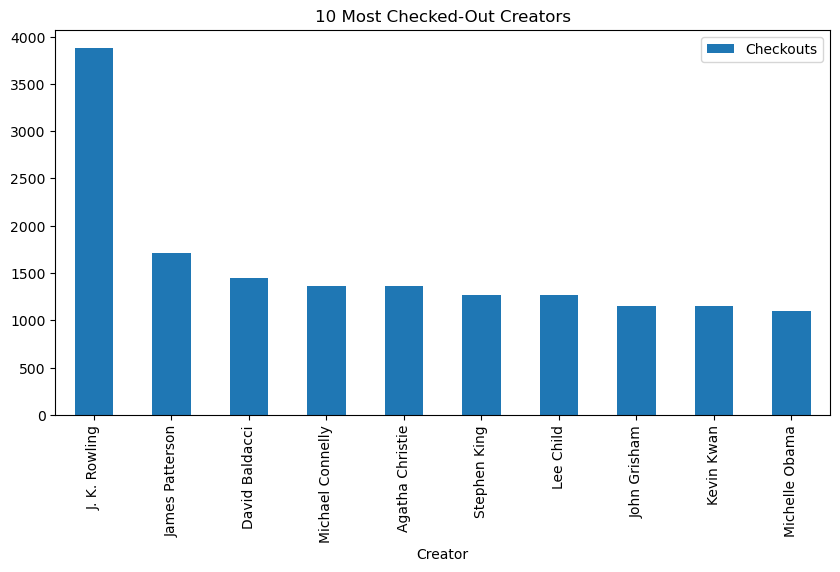

In [25]:
top_10_creators.plot(kind='bar', figsize=(10, 5), title='10 Most Checked-Out Creators')

# Grouping multiple columns

We can also try to compare statistics for different periods of time. 

``seattle_checkouts_2020.csv`` contains all the checkout data over 2020.

**You can download more Seattle public library data at [this link](https://data.seattle.gov/Community/SPL-Checkouts-2018-2022/cz4y-bvp5). (You can filter by e.g. year, then click the export button to download the filtered data.)**

In [1]:
import pandas as pd
checkouts2020_df = pd.read_csv('seattle_checkouts_2020.csv')
checkouts2020_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,NaN,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,NaN,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,NaN,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,NaN,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,NaN,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
1721371,Digital,OverDrive,EBOOK,2020,12,4,Blueberries for Sal,NaN,Robert McCloskey,"Juvenile Fiction, Juvenile Literature, Picture...","Penguin Group (USA), Inc.",2014
1721372,Physical,Horizon,BOOK,2020,12,1,Squad / Mariah MacCarthy.,NaN,"MacCarthy, Mariah","Cheerleading Juvenile fiction, Best friends Ju...","Farrar Straus Giroux,",2019.
1721373,Physical,Horizon,BOOK,2020,12,2,Out of this world : poems and facts about spac...,NaN,"Sklansky, Amy E.","Outer space Juvenile poetry, Outer space Juven...","Alfred A. Knopf,",[2012]
1721374,Physical,Horizon,BOOK,2020,12,5,"Ring shout : or, Hunting Ku Kluxes in the end ...",NaN,"Clark, P. Djèlí","Ku Klux Klan 1915 Fiction, African Americans G...","Tordotcom,",2020.


### Question
How can I track how the mean number of checkouts change over time? 

Group by Checkout Month, then isolate the "Checkouts" values. Then, take the mean. 

In [6]:
mean_checkouts_per_month = checkouts2020_df[["CheckoutMonth", "Checkouts"]].groupby("CheckoutMonth").mean()

Plot the results!

<Axes: xlabel='CheckoutMonth'>

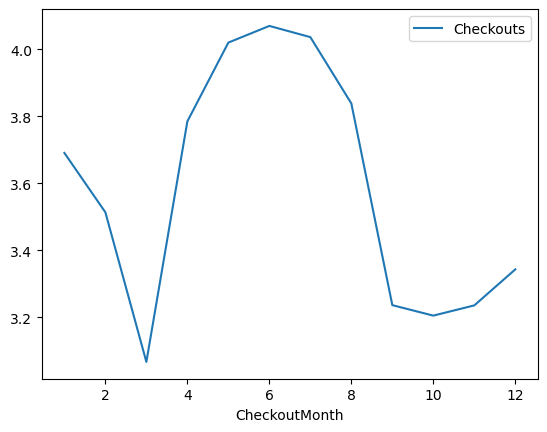

In [7]:
mean_checkouts_per_month.plot(kind="line")

### Question 
How can I track how the **total** number of checkouts change over time? 

Note: I should isolate for only the relevant columns I need first. 

In [3]:
checkouts_per_month = checkouts2020_df[["CheckoutMonth", "Checkouts"]].groupby("CheckoutMonth").sum()

<Axes: xlabel='CheckoutMonth'>

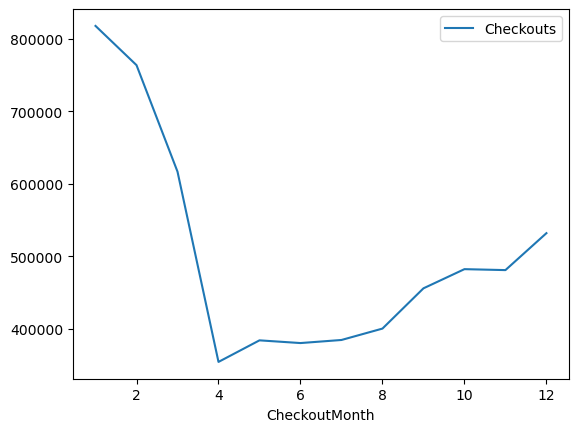

In [4]:
checkouts_per_month.plot(kind="line")

### Question

I want to find data on the prevalence of each material type being checked out in each month. First, group ``checkouts2020_df`` by checkout month, then by material type. Then, apply the `.size()` and `.unstack(fill_value=0)` methods as seen in lecture. Store the result in a variable called `material_types_per_month_df`.

In [9]:
checkouts2020_df.groupby(["CheckoutMonth", "MaterialType"]).size().unstack(fill_value=0)

MaterialType,ATLAS,AUDIOBOOK,BOOK,CR,EBOOK,ER,"ER, NONPROJGRAPH","ER, PRINT","ER, SOUNDDISC","ER, VIDEODISC",...,"SOUNDDISC, VIDEOCASS","SOUNDDISC, VIDEODISC",SOUNDREC,UNSPECIFIED,VIDEO,VIDEOCART,VIDEOCASS,VIDEODISC,VIDEOREC,VISUAL
CheckoutMonth,,,,,,,,,,,,,,,,,,,,,
1,13,25307,103645,89,55642,67,1,0,31,25,...,0,145,83,5,148,2,6,18888,1,10
2,19,25202,100713,71,54846,64,1,1,46,21,...,0,153,52,5,115,2,4,18837,1,9
3,17,25559,84689,51,62678,42,1,1,34,17,...,0,103,64,5,151,2,4,16375,1,7
4,0,25810,66,0,67548,0,0,0,0,0,...,0,0,0,0,236,0,0,4,0,0
5,0,26588,87,0,68724,0,0,0,0,0,...,0,0,0,0,177,0,0,3,0,0
6,0,26198,42,0,67079,0,0,0,0,0,...,0,0,0,0,173,0,0,4,0,0
7,0,27381,50,0,67741,0,0,0,0,0,...,0,0,0,0,135,0,0,12,0,0
8,0,27377,6579,2,67137,5,0,0,2,3,...,0,10,2,1,155,0,0,1994,0,1
9,9,26958,35899,10,66292,20,0,1,16,10,...,0,41,20,2,195,0,0,6389,1,3


In [10]:
material_types_per_month_df = checkouts2020_df.groupby(["CheckoutMonth", "MaterialType"]).size().unstack(fill_value=0)

In [11]:
#Now, isolate the most relevant columns
material_types_per_month_df[["AUDIOBOOK", "BOOK", "EBOOK", "VIDEO", "VIDEODISC"]]

MaterialType,AUDIOBOOK,BOOK,EBOOK,VIDEO,VIDEODISC
CheckoutMonth,,,,,
1,25307,103645,55642,148,18888
2,25202,100713,54846,115,18837
3,25559,84689,62678,151,16375
4,25810,66,67548,236,4
5,26588,87,68724,177,3
6,26198,42,67079,173,4
7,27381,50,67741,135,12
8,27377,6579,67137,155,1994
9,26958,35899,66292,195,6389


Make a line graph showing how the main material types checked out per month change over time. 

<Axes: title={'center': 'Material Types Checked Out in 2020'}, xlabel='Checkout Month'>

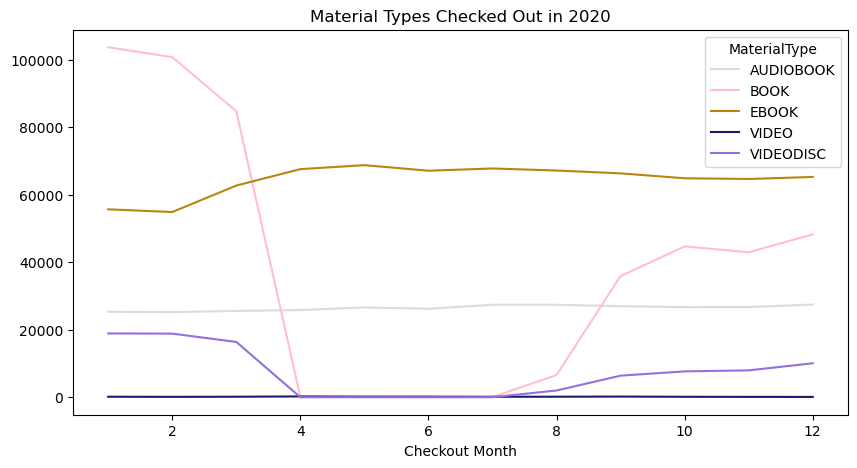

In [12]:
#Make a chart!
material_types_per_month_df[["AUDIOBOOK", "BOOK", "EBOOK", "VIDEO", "VIDEODISC"]].plot(kind='line', \
                                   figsize=(10, 5), \
                                   xlabel = 'Checkout Month',  \
                                   title='Material Types Checked Out in 2020', \
                                   color=["gainsboro", "pink", "darkgoldenrod", "midnightblue", "mediumpurple"])

**Chart colours**

In the above chart, we specified a *list* of colours to use with the extra parameter `color=["gainsboro", "pink", "darkgoldenrod", "midnightblue", "mediumpurple"]`

List of named colors:
https://matplotlib.org/stable/gallery/color/named_colors.html

You can also use hex codes, e.g. `'#fa8702'`
https://htmlcolorcodes.com/